IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_15120\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\L

In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.025278   0.017191   -0.117391   0.133346         79.0   
1       1.0 -0.025284   0.017142   -0.109234   0.133164        107.0   
2       2.0 -0.025410   0.017099   -0.104507   0.133027        110.0   
3       3.0 -0.026125   0.017232   -0.127146   0.133661         78.0   
4       4.0 -0.026810   0.017350   -0.150134   0.134237         81.0   
...     ...       ...        ...         ...        ...          ...   
1327   61.0 -0.033834   0.004468   -0.091229   0.074844          0.0   
1328   62.0 -0.033994   0.004467   -0.098090   0.074915          0.0   
1329   63.0 -0.034181   0.004471   -0.108344   0.075024          0.0   
1330   64.0 -0.034515   0.004507   -0.121542   0.075413          0.0   
1331   65.0 -0.034765   0.004522   -0.137664   0.075629          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            76.0    3.609819    3.564965 -0.021368  ... 

In [5]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.025278   0.017191   -0.117391   0.133346         79.0         76.0   
1    -0.025284   0.017142   -0.109234   0.133164        107.0         87.0   
2    -0.025410   0.017099   -0.104507   0.133027        110.0         92.0   
3    -0.026125   0.017232   -0.127146   0.133661         78.0         75.0   
4    -0.026810   0.017350   -0.150134   0.134237         81.0         82.0   
...        ...        ...         ...        ...          ...          ...   
1327 -0.033834   0.004468   -0.091229   0.074844          0.0         77.0   
1328 -0.033994   0.004467   -0.098090   0.074915          0.0         82.0   
1329 -0.034181   0.004471   -0.108344   0.075024          0.0        108.0   
1330 -0.034515   0.004507   -0.121542   0.075413          0.0         85.0   
1331 -0.034765   0.004522   -0.137664   0.075629          0.0         77.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [6]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [7]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  387 Guasto 5%:  412 Guasto 10%:  533


### Bilanciamento del dataset

In [8]:
#bilanciamento del dataset con undersampling rispetto al no_guasto
balanced_d = pd.concat([no_guasto, guasto_10.sample(len(no_guasto)), guasto_5.sample(len(no_guasto))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(1161, 169)

In [9]:
#x = df_1.iloc[:,:-1]
#y = df_1.iloc[:,-1:]

### Separazione del dataset in training e test

In [10]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(928, 168)
(233, 168)
(928, 1)
(233, 1)


In [11]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [12]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Accuracy: 0.97 	 ---> LogisticRegression 
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Accuracy: 1.0 	 ---> RandomForestClassifier 
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Accuracy: 0.94 	 ---> AdaBoostClassifier 
Accuracy: 1.0 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.97 	 ---> SVC 


### Matrici di confusione

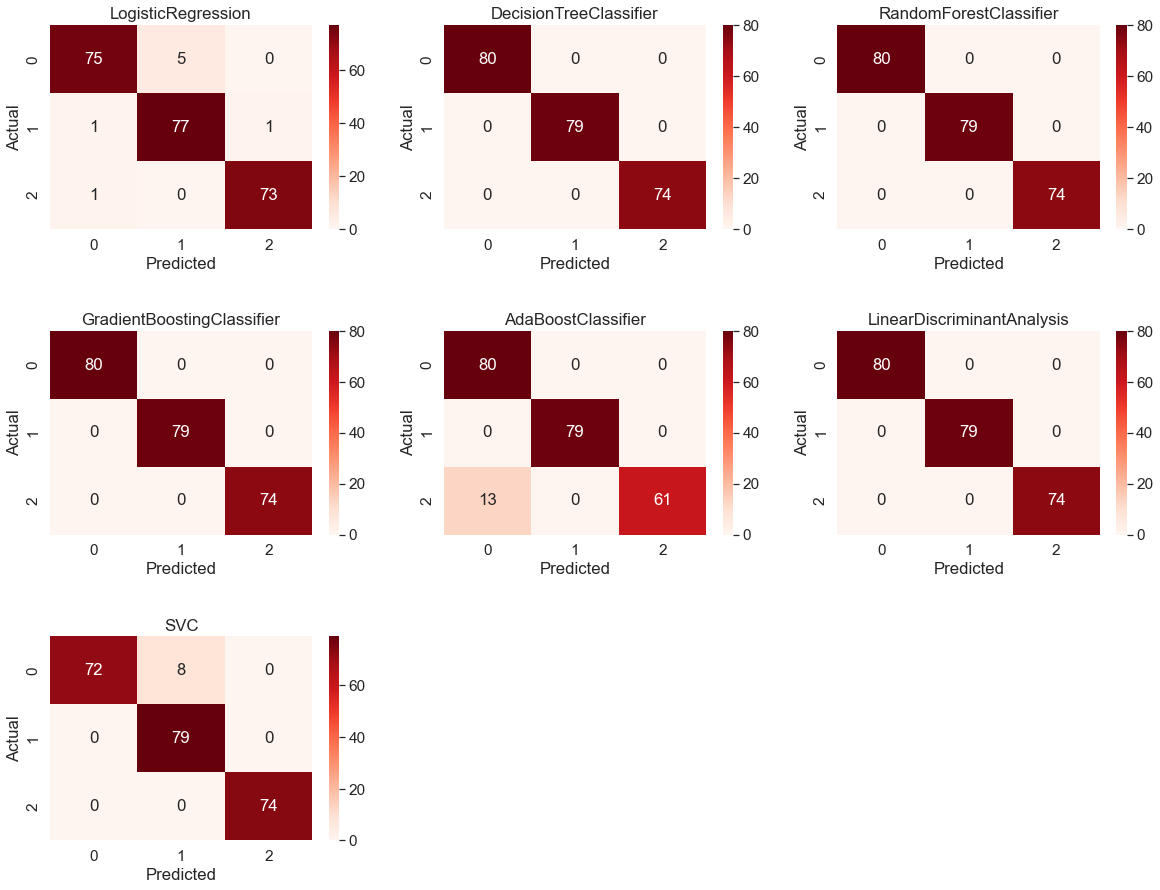

In [13]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [14]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        80
           1       0.94      0.97      0.96        79
           2       0.99      0.99      0.99        74

    accuracy                           0.97       233
   macro avg       0.97      0.97      0.97       233
weighted avg       0.97      0.97      0.97       233

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

In [15]:
# Search grid for optimal parameters. Si vanno a testare tutte le possibili combinazioni di iperparametri

#DecisionTree Iperparametri
DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}

#GradientBoosting Iperparametri
GB_param = {'loss' : ["deviance"],
            'n_estimators' : [100,200,300],
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth': [4, 8],
            'min_samples_leaf': [100,150],
            'max_features': [0.3, 0.1]}

#SVC_param = {'C':[1,10,100,1000],
#             'gamma':[1,0.1,0.001,0.0001], 
#             'kernel':['linear','rbf']}

#RF_param = {"max_depth": [None],
#            "max_features": [0.3, 0.7, 1],
#            "min_samples_split": [2, 3, 10],
#            "min_samples_leaf": [1, 3, 10],
#            "bootstrap": [False],
#            "n_estimators" :[100,300],
#            "criterion": ["gini"]}

#using 4 n_jobs for faster processing
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
GBgs = GridSearchCV(GradientBoostingClassifier(), param_grid=GB_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

models = [DTgs, GBgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train.values.ravel())
    gs_model.append(model.best_estimator_) #si salva il miglior modello
    score.append(model.best_score_) #si salva lo score

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Index(['Guasto', 'LogisticRegression', 'DecisionTreeClassifier',
       'RandomForestClassifier', 'GradientBoostingClassifier',
       'AdaBoostClassifier', 'LinearDiscriminantAnalysis', 'SVC'],
      dtype='object')


Text(0.5, 1.0, 'Correlation between models')

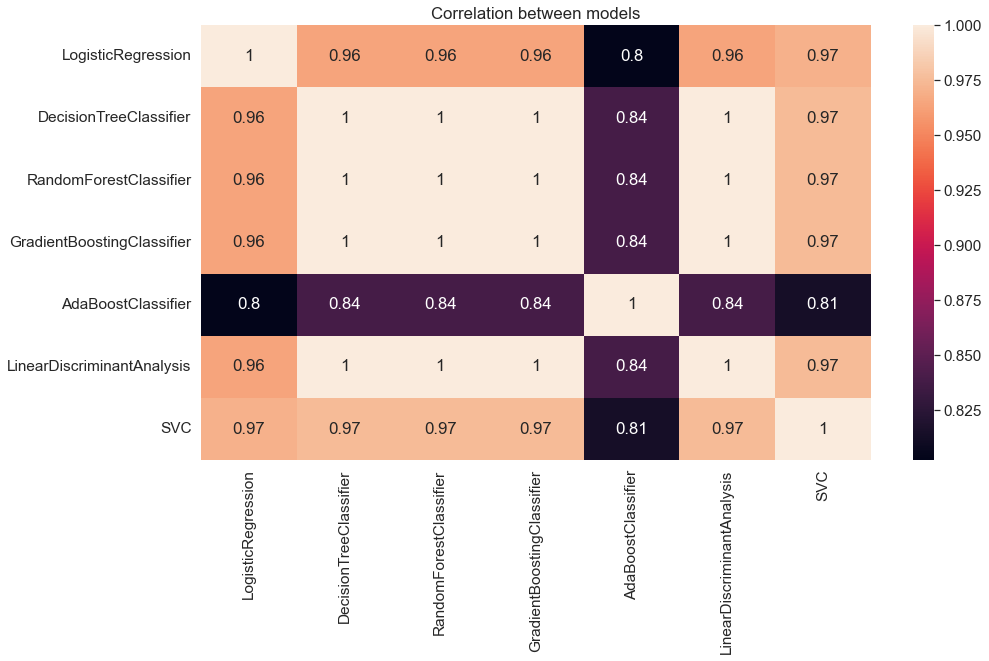

In [17]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
print(model_results.columns)
sns.heatmap(model_results.drop("Guasto", axis=1).corr(),annot=True)
plt.title("Correlation between models")

MODEL ENSEMBLE

In [18]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('dt', gs_model[0]), ('rf', gs_model[1])], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train.values.ravel())
print(accuracy_score(y_test,best_model.predict(x_test)))

1.0


TESTING DEL MODELLO

In [ ]:
#livello_pred = pd.Series(best_model.predict(allMadrid_test), name='Livello_test')
#livello_pred.value_counts()